**Installing the Libraries**

In [16]:
# for mathematical operation
import numpy as np

# for dataframe manipulation
import pandas as pd

# for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# for data analysis
from sklearn.cluster import KMeans

**Importing the Dataset**

In [18]:
# importing the dataset
df = pd.read_csv('G:\PGP\Campusing\Projects\Customer Segmentation\Mall_Customers.csv')

**Checking the Data**

In [19]:
# checking shape of data
df.shape

(200, 5)

In [20]:
# checking head of data
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [22]:
# checking 5 samples of data
df.sample(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
14,15,Male,37,20,13
2,3,Female,20,16,6
84,85,Female,21,54,57
32,33,Male,53,33,4
165,166,Female,36,85,75


In [25]:
# checking the dataype of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [26]:
# checking for null values
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [30]:
# describing the data
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


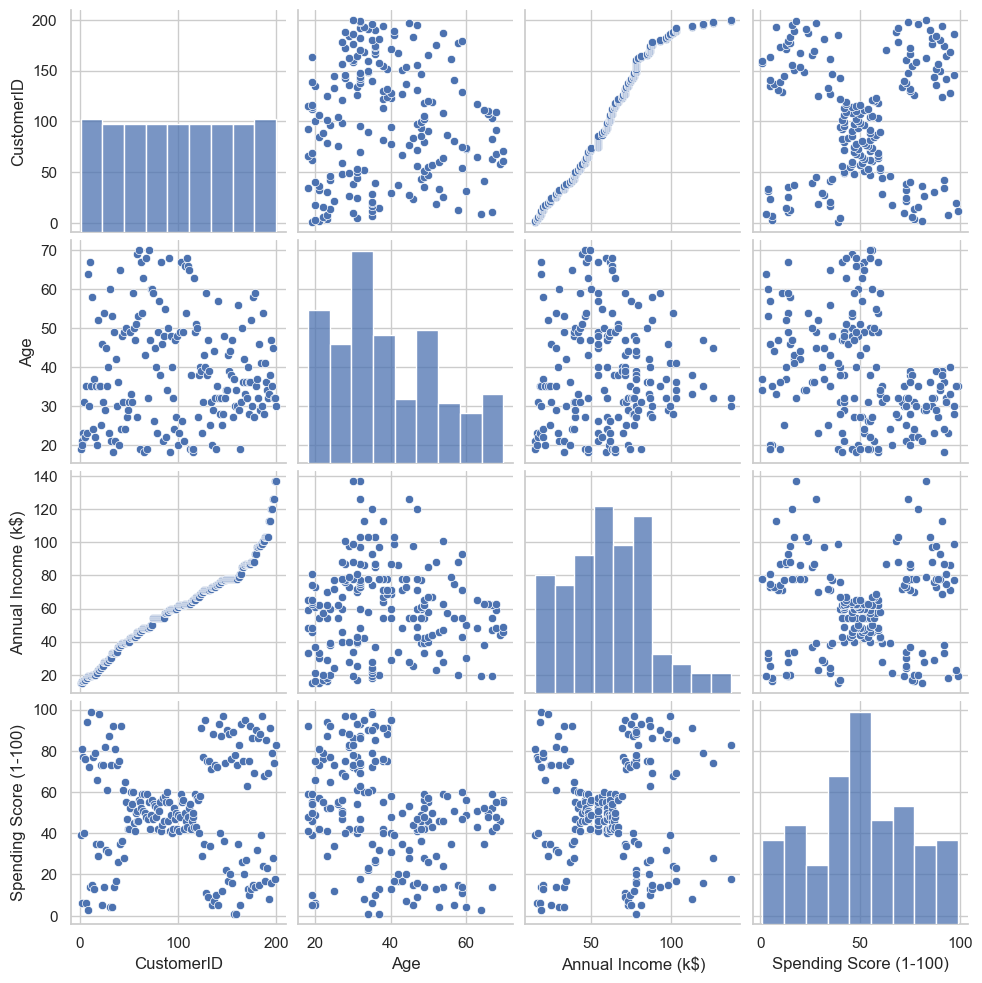

In [40]:
# checking the pairplot of the data
sns.pairplot(df)
plt.show()

**Data Visualization**

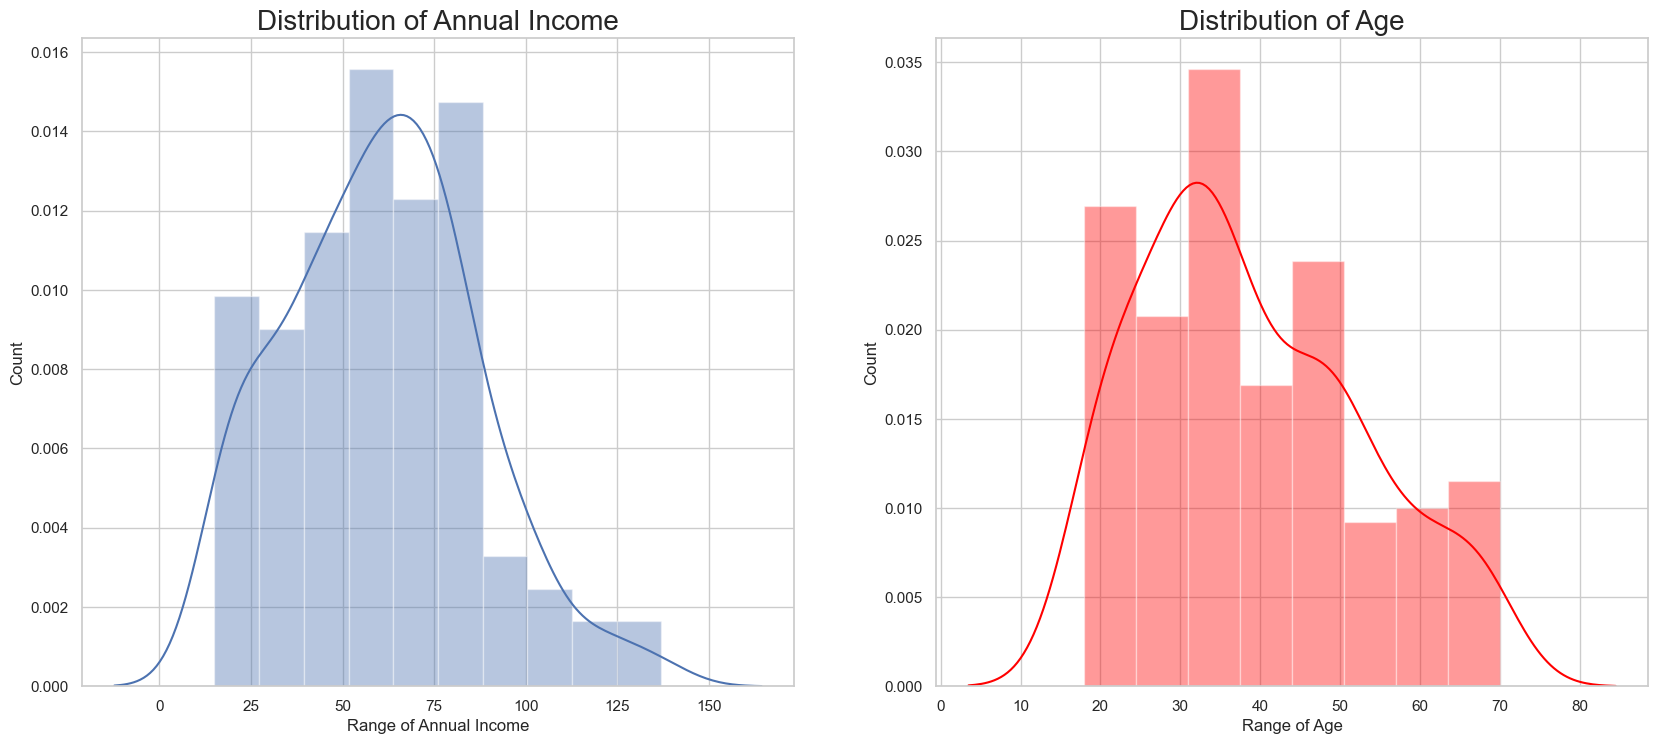

In [34]:
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (18, 8)

plt.subplot(1, 2, 1)
sns.set(style = 'whitegrid')
sns.distplot(data['Annual Income (k$)'])
plt.title('Distribution of Annual Income', fontsize = 20)
plt.xlabel('Range of Annual Income')
plt.ylabel('Count')


plt.subplot(1, 2, 2)
sns.set(style = 'whitegrid')
sns.distplot(data['Age'], color = 'red')
plt.title('Distribution of Age', fontsize = 20)
plt.xlabel('Range of Age')
plt.ylabel('Count')
plt.show()

> The above plots shows the Distribution pattern of Annual Income and Age.

> We can interpret that -
>> There are few customers who earn more than 100 US Dollars.
>> Most of the customers have an earning of around 50-75 US Dollars.
>> Also, we can say that the least Income is around 20 US Dollars.

> Interpretation for Age groups - 
>> The most regular customers for the Mall has age around 30-35 years of age.
>> Whereas the the senior citizens age group is the least frequent visitor in the Mall.
>> Youngsters are lesser in number as compared to the Middle aged people.


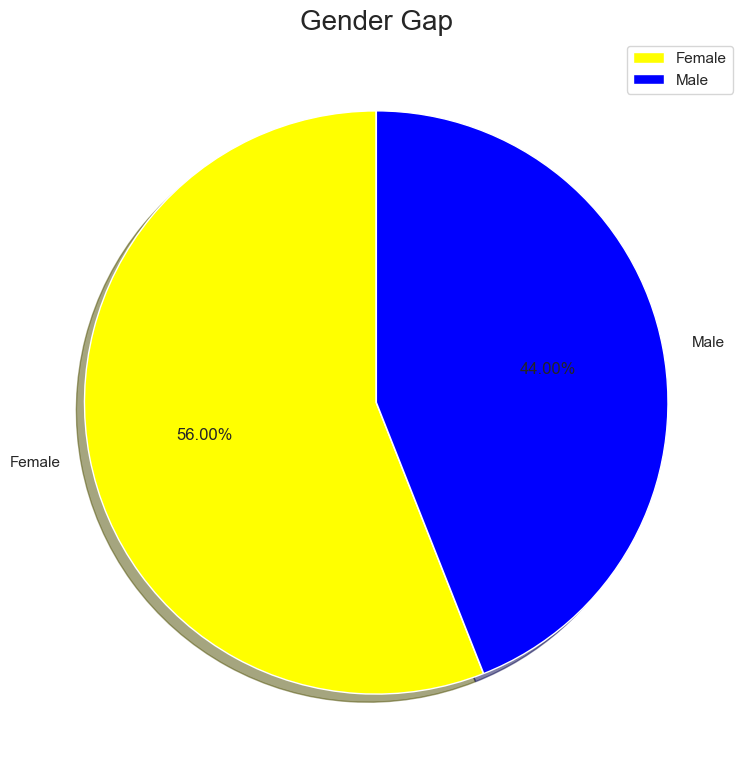

In [45]:
labels = ['Female', 'Male']
size = df['Gender'].value_counts()
colors = ['yellow', 'blue']
explode = [0, 0.001]

plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, startangle = 90, autopct = '%.2f%%')
plt.title('Gender Gap', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

> The pie chart shows the distribution of Gender in the Mall
>> Interestingly, The Females are more(56%) compared to the Males(44%), and we can infer a huge gap here as the population of Males is comparatively higher than Females.

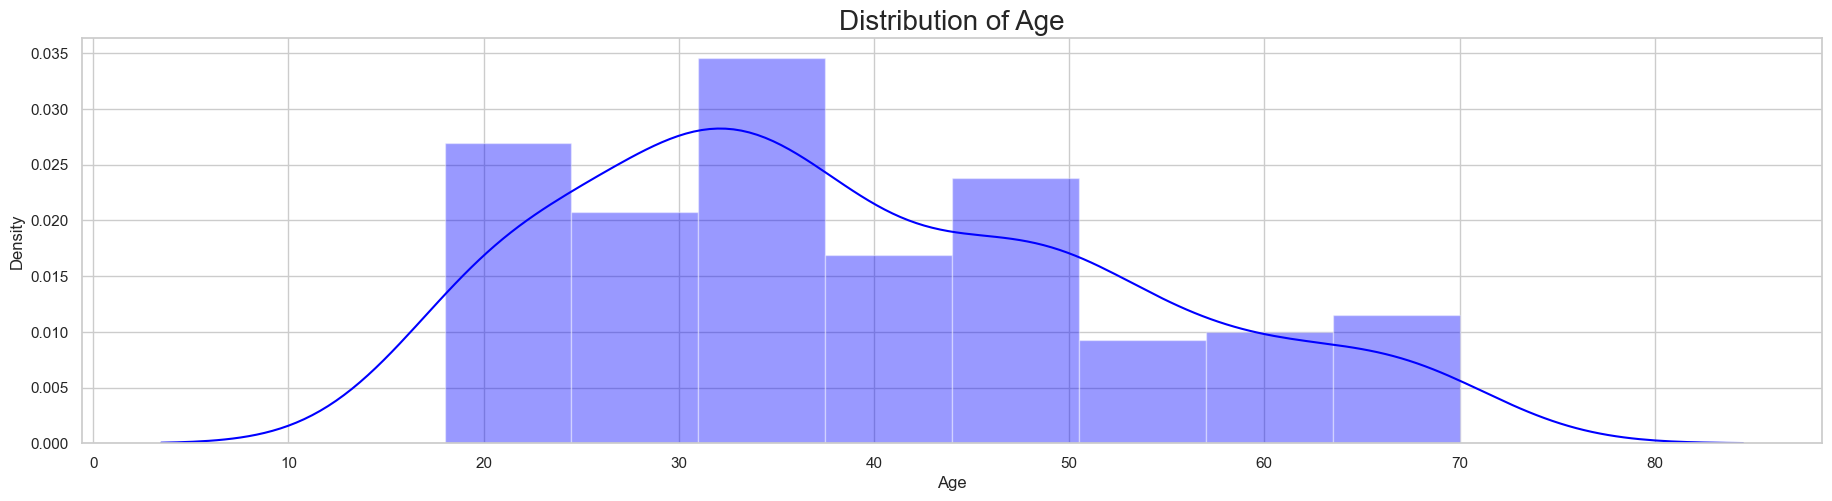

In [54]:
plt.rcParams['figure.figsize'] = (20, 5)
sns.distplot(df['Age'], color='blue')
plt.title('Distribution of Age', fontsize = 20)
plt.show()

> This Graph displays a more Interactive Chart about the distribution of each Age Group in the Mallhere we can get a clear overview of the customers who are visiting the mall.

>> By looking at the above graph-, It can be seen that the Ages from 27 to 39 are very much frequent but there is no clear pattern, we can only find some group wise patterns such as the the older age groups are lesser frequent in comparison.
>> Interesting Fact, There are equal no. of Visitors in the Mall for the Agee 18 and 67.
>> People of Age 55, 56, 69, 64 are very less frequent in the Malls.
>> People at Age 32 are the Most Frequent Visitors in the Mall.

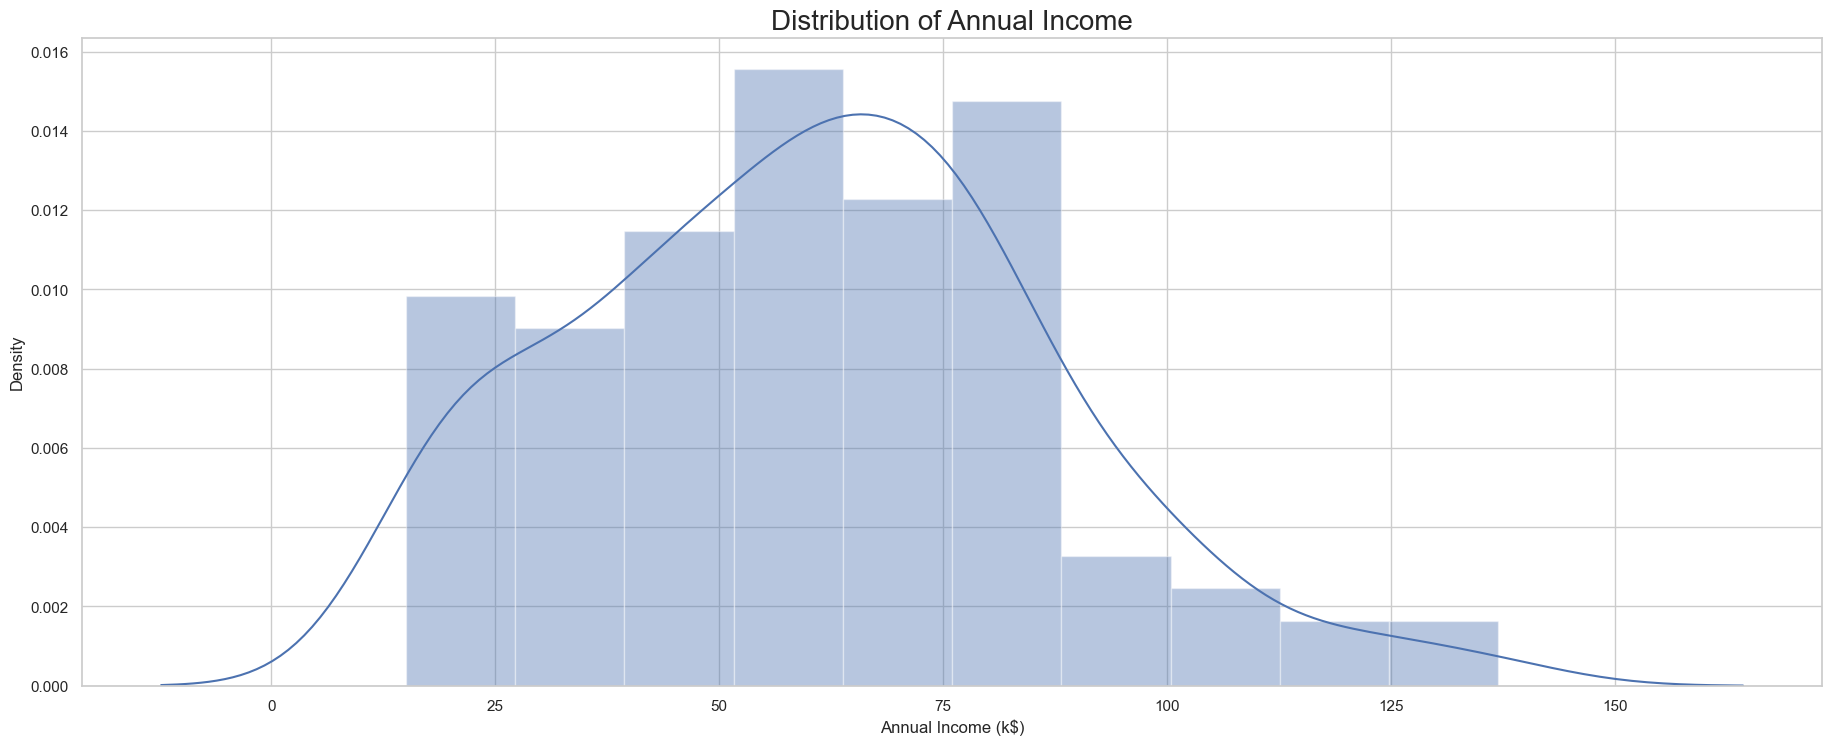

In [55]:
# ditribution of Annual Income

plt.rcParams['figure.figsize'] = (20, 8)
sns.distplot(df['Annual Income (k$)'])
plt.title('Distribution of Annual Income', fontsize = 20)
plt.show()

> Again, This is also a chart to better explain the Distribution of Each Income level.

> Interestingly, there are customers in the mall with a very much comparable frequency with their Annual Income ranging from 15k USD to 137k US Dollars.

> There are more Customers in the Mall who have their Annual Income as 54k US Dollars or 78 US Dollars.

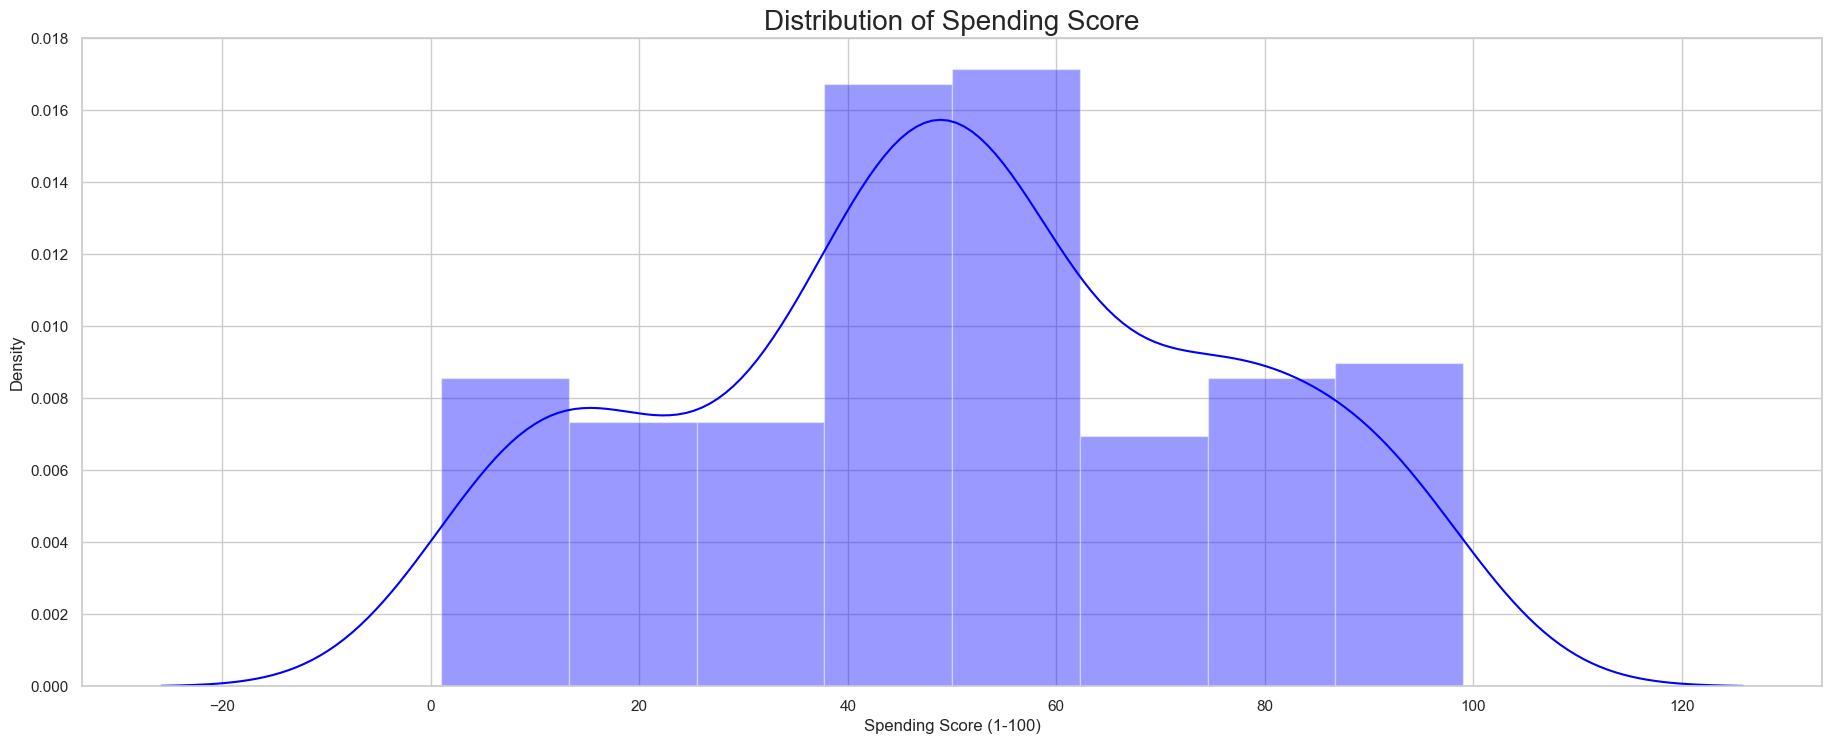

In [56]:
# distribution of Spending Score

plt.rcParams['figure.figsize'] = (20, 8)
sns.distplot(df['Spending Score (1-100)'], color = 'blue')
plt.title('Distribution of Spending Score', fontsize = 20)
plt.show()

> The above distribution shows the Spending Score of the Customers Visiting the Mall.
> 
>> On a general level, we may conclude that most of the Customers have their Spending Score in the range of 35-60.
>> Interesting there are customers having spending score as 1 as well as spending score of 99., Which shows that the mall caters to the variety of Customers with Varying needs and requirements available in the Mall.

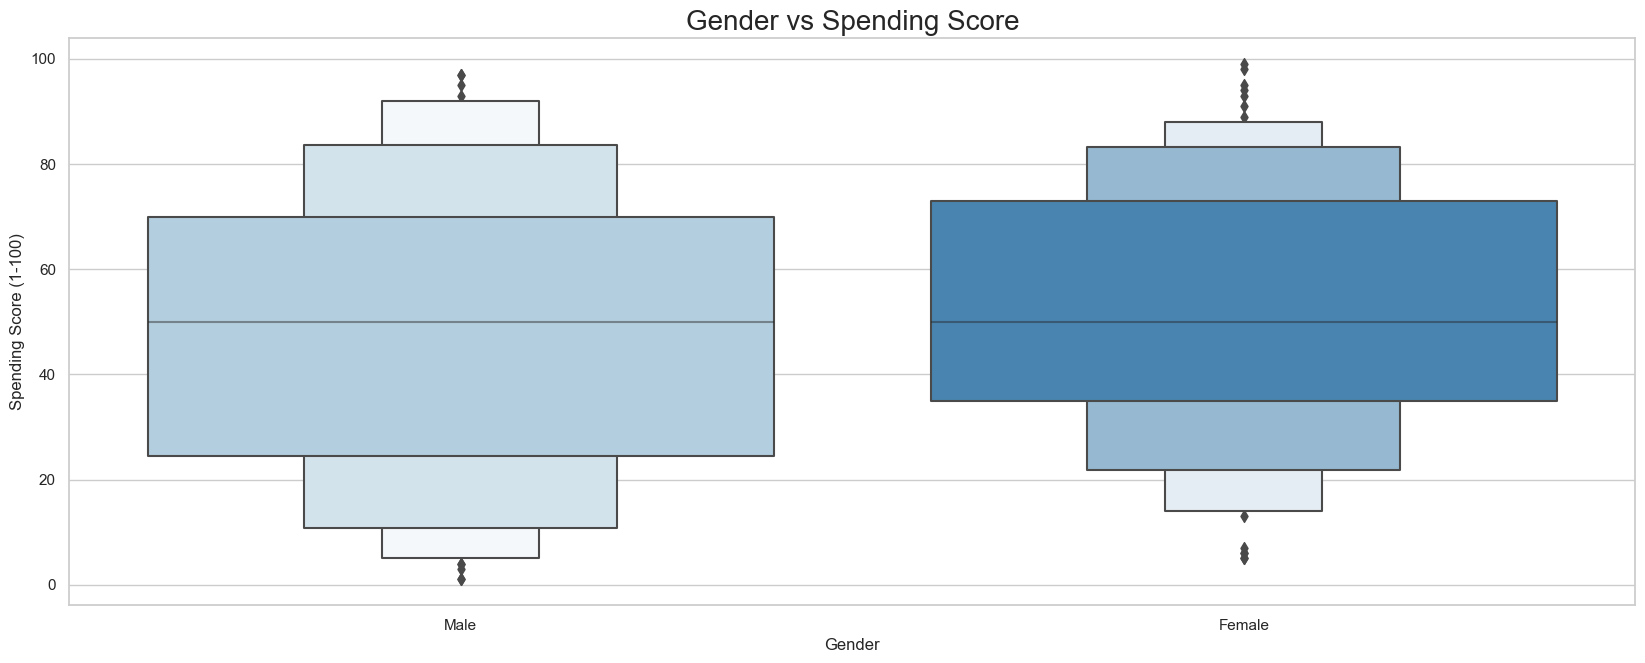

In [51]:
#  Gender vs Spending score

plt.rcParams['figure.figsize'] = (18, 7)
sns.boxenplot(x = df['Gender'], y = df['Spending Score (1-100)'], palette = 'Blues')
plt.title('Gender vs Spending Score', fontsize = 20)
plt.show()

> Bi-variate Analysis between Gender and Spending Score,
>> It is clearly visible that the most of the males have a Spending Score of around 25k US Dollars to 70k US Dollars whereas the Females have a spending score of around 35k US Dollars to 75k US Dollars. which clearly show us that the Women are Shopping Leaders.

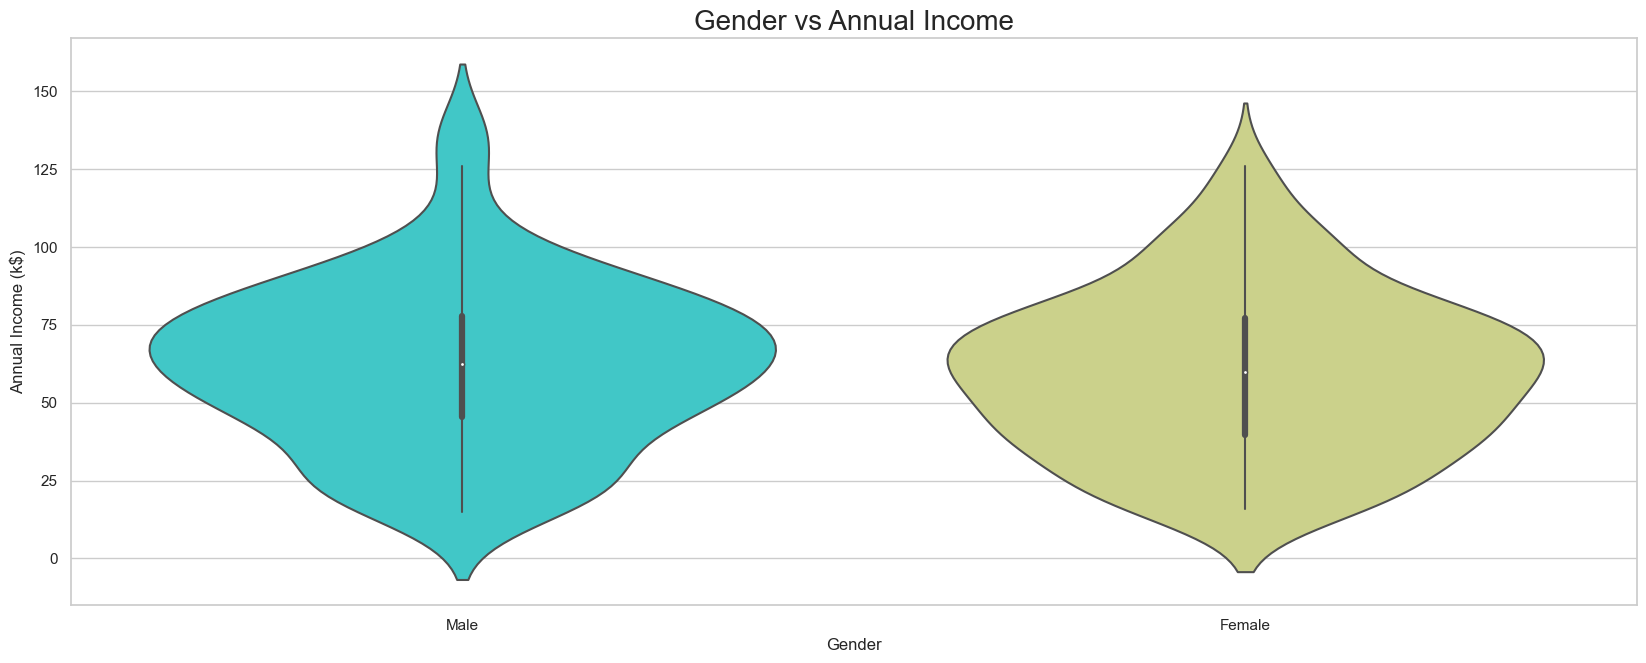

In [57]:
## Gender vs Annual Income

plt.rcParams['figure.figsize'] = (18, 7)
sns.violinplot(x = df['Gender'], y = df['Annual Income (k$)'], palette = 'rainbow')
plt.title('Gender vs Annual Income', fontsize = 20)
plt.show()

> Again a Bivariate Analysis between the Gender and the Annual Income, to better visualize the Income of the different Genders.
>> There are more number of males who get paid more than females. But, The number of males and females are equal in number when it comes to low annual income.

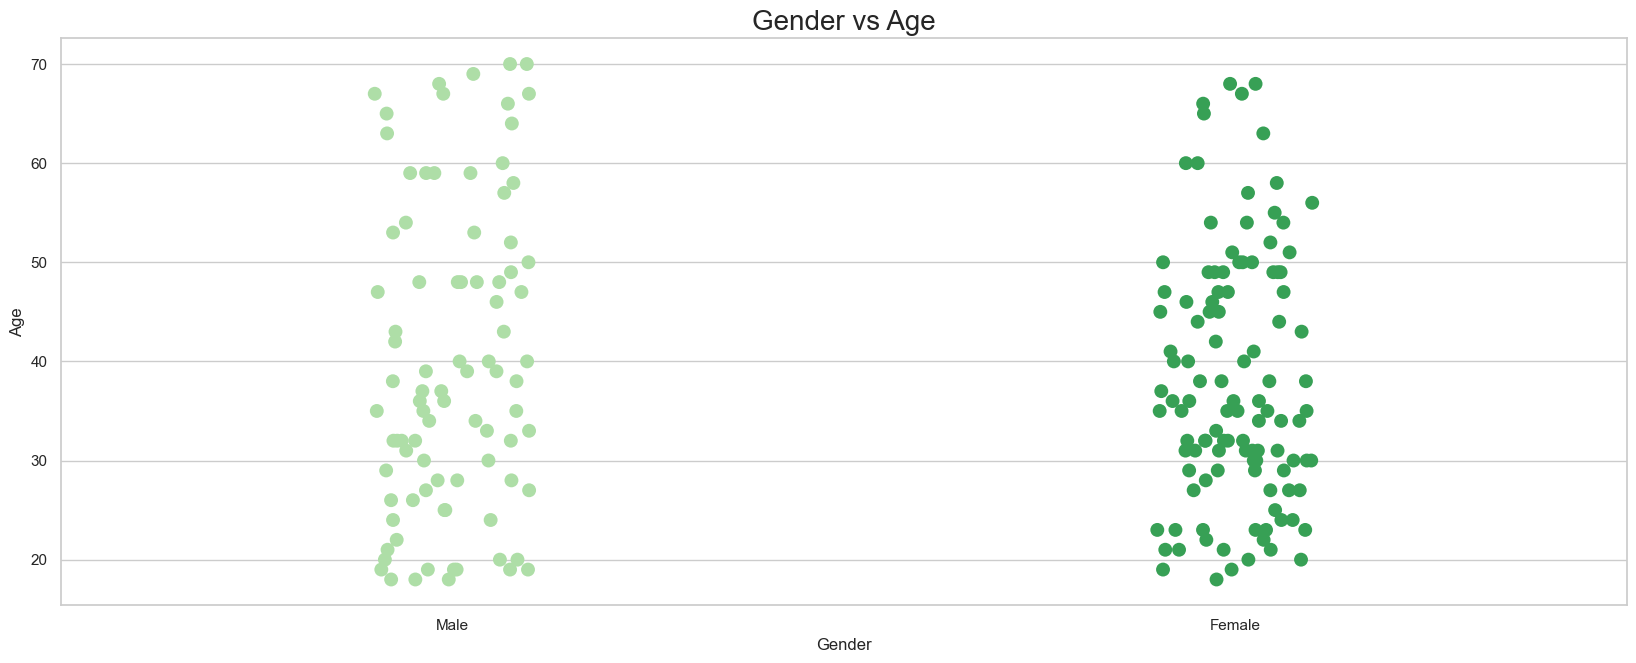

In [63]:
# Gender vs Age

plt.rcParams['figure.figsize'] = (18, 7)
sns.stripplot(x = df['Gender'], y = df['Age'], palette = 'Greens', size = 10)
plt.title('Gender vs Age', fontsize = 20)
plt.show()

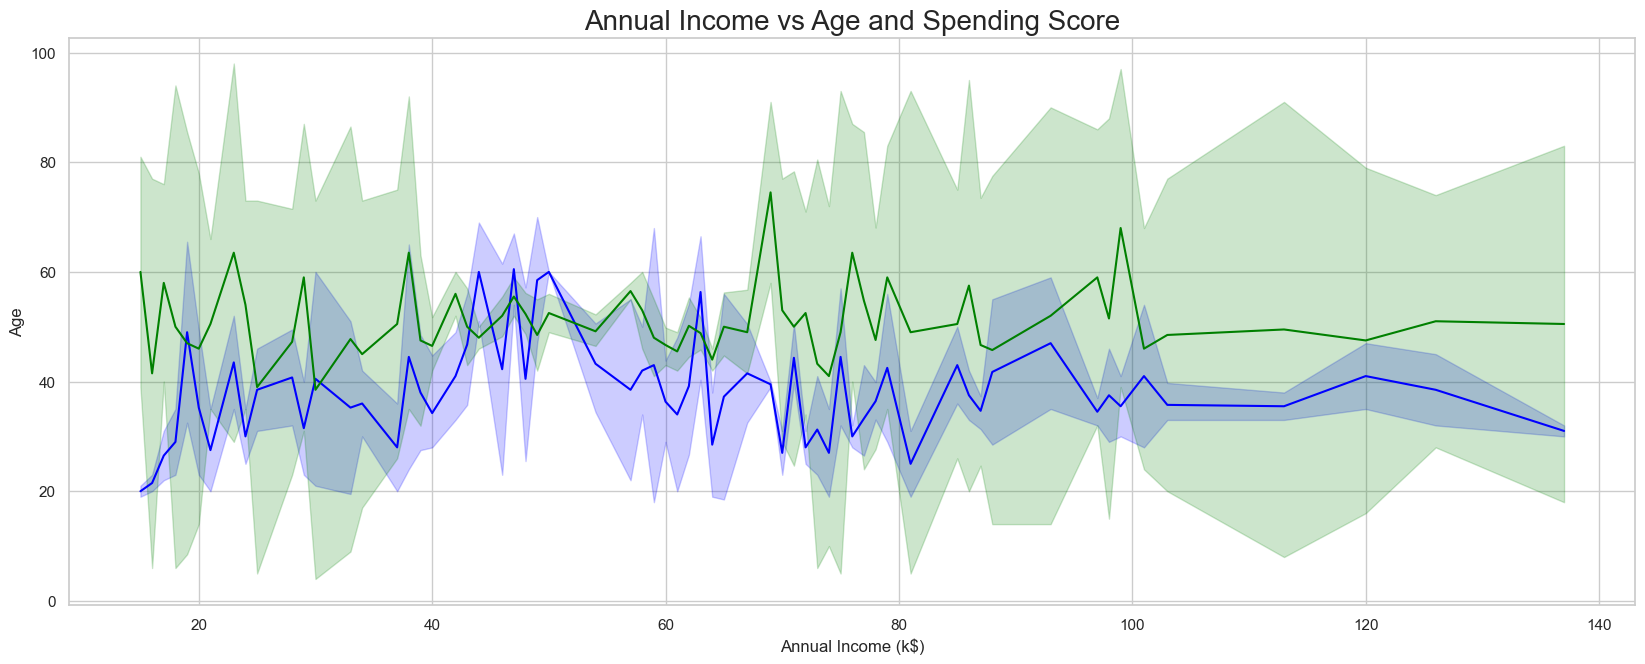

In [66]:
# Annual Income vs Age and Spending Score

sns.lineplot(x = df['Annual Income (k$)'], y = df['Age'], color = 'blue')
sns.lineplot(x = df['Annual Income (k$)'], y = df['Spending Score (1-100)'], color = 'green')
plt.title('Annual Income vs Age and Spending Score', fontsize = 20)
plt.show()

> The above Plot Between Annual Income and Age represented by a blue color line, and a plot between Annual Income and the Spending Score represented by a green color which shows how Age and Spending Varies with Annual Income.

## Clustering Analysis

In [67]:
# Our goal is to create clusters of Customers who share similar behaviour for that lets select the columns - Spending score, and Annual Income

# importing the warnings library to avoid warnings
import warnings
warnings.filterwarnings('ignore')

# selecting the Spending score, and Annual Income Columns from the Data
x = df.loc[:, ['Spending Score (1-100)', 'Annual Income (k$)']].values

# shape of x
print(x.shape)

(200, 2)


In [69]:
# Checking the data, which we are going to use for the clustering analysis
x_data  = pd.DataFrame(x)

In [70]:
# Checking the new data
x_data.head()

,0,1
0,39,15
1,81,15
2,6,16
3,77,16
4,40,17


> Here 0 denotes Spending Score and 1 denotes Annual Income

## Kmeans Algorithm

**The Elbow Method to find the No. of Optimal Clusters**

  File "G:\Anaconda\Lib\site-packages\joblib\externals\loky\backend\context.py", line 217, in _count_physical_cores
    raise ValueError(


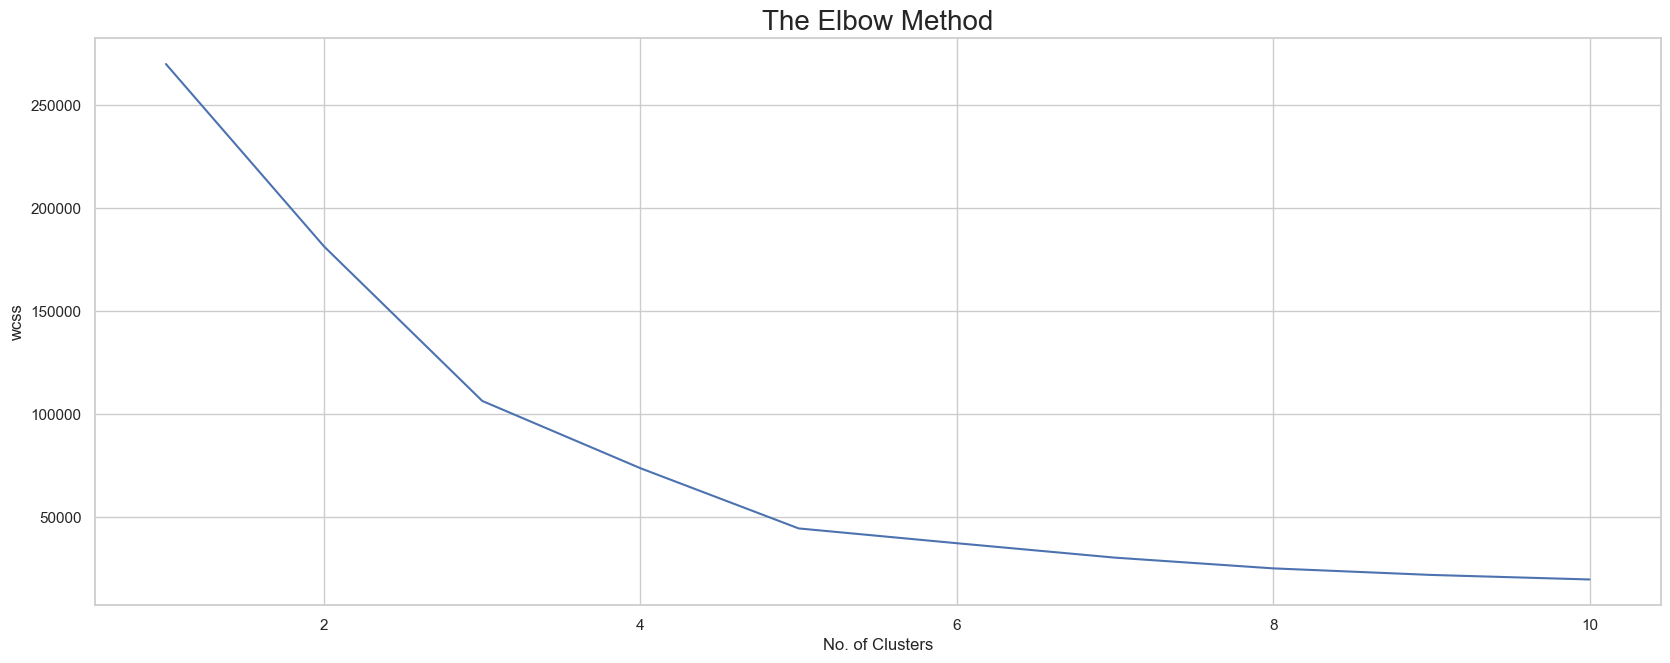

In [71]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(x)
    wcss.append(km.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

**Visualizaing the Clusters**

Cluster Assignment :
[3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 4 3 4 3 4 3 0 3 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 0 1 2 1 2 1 0 1 2 1 2 1 2 1 2 1 0 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


Centroid for Each Cluster :
[[49.51851852 55.2962963 ]
 [82.12820513 86.53846154]
 [17.11428571 88.2       ]
 [20.91304348 26.30434783]
 [79.36363636 25.72727273]]




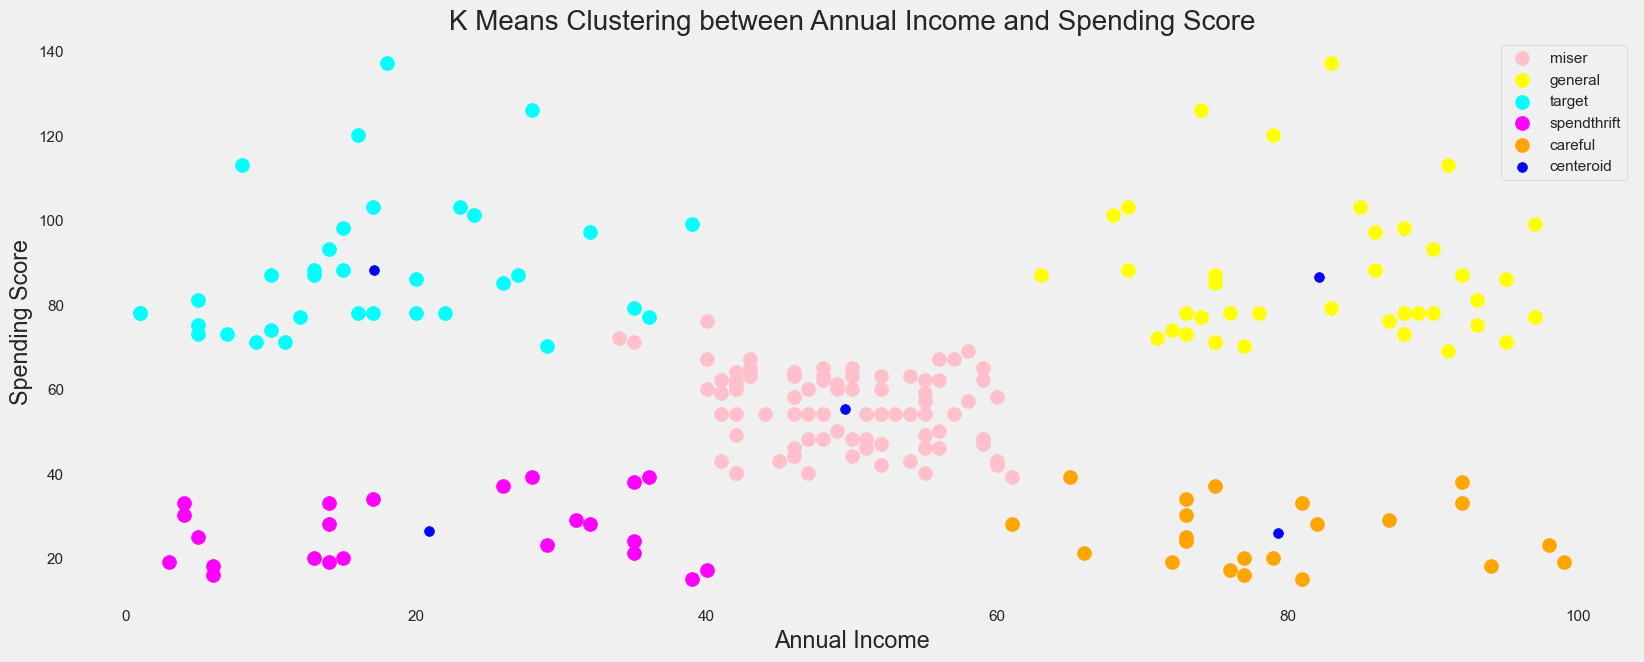

In [75]:
plt.style.use('fivethirtyeight')

km = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

print(f'Cluster Assignment :\n{y_means}\n\n')

print(f'Centroid for Each Cluster :\n{km.cluster_centers_}\n\n')

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'pink', label = 'miser')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'yellow', label = 'general')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 100, c = 'cyan', label = 'target')
plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], s = 100, c = 'magenta', label = 'spendthrift')
plt.scatter(x[y_means == 4, 0], x[y_means == 4, 1], s = 100, c = 'orange', label = 'careful')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.style.use('fivethirtyeight')
plt.title('K Means Clustering between Annual Income and Spending Score', fontsize = 20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()

> This Clustering Analysis gives us a very clear insight about the different segments of the customers in the Mall. There are clearly Five segments of Customers as Miser, General, Target, Spendthrift andCareful based on their Annual Income and Spending Score which are reportedly the best factors/attributes to determine the segments of a customer in a Mall.

### Clustering between Age and Spending Score

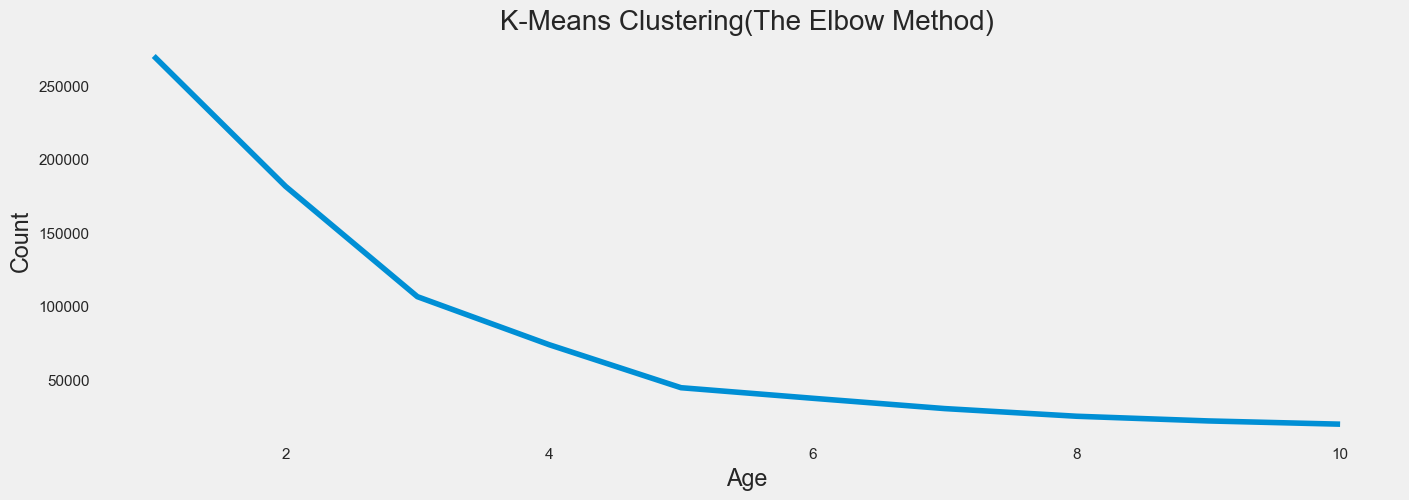

In [76]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

plt.rcParams['figure.figsize'] = (15, 5)
plt.plot(range(1, 11), wcss)
plt.title('K-Means Clustering(The Elbow Method)', fontsize = 20)
plt.xlabel('Age')
plt.ylabel('Count')
plt.grid()
plt.show()

Cluster Assignment :
[3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 4 3 4 3 4 3 0 3 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 0 1 2 1 2 1 0 1 2 1 2 1 2 1 2 1 0 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


Centroid for Each Cluster :
[[49.51851852 55.2962963 ]
 [82.12820513 86.53846154]
 [17.11428571 88.2       ]
 [20.91304348 26.30434783]
 [79.36363636 25.72727273]]




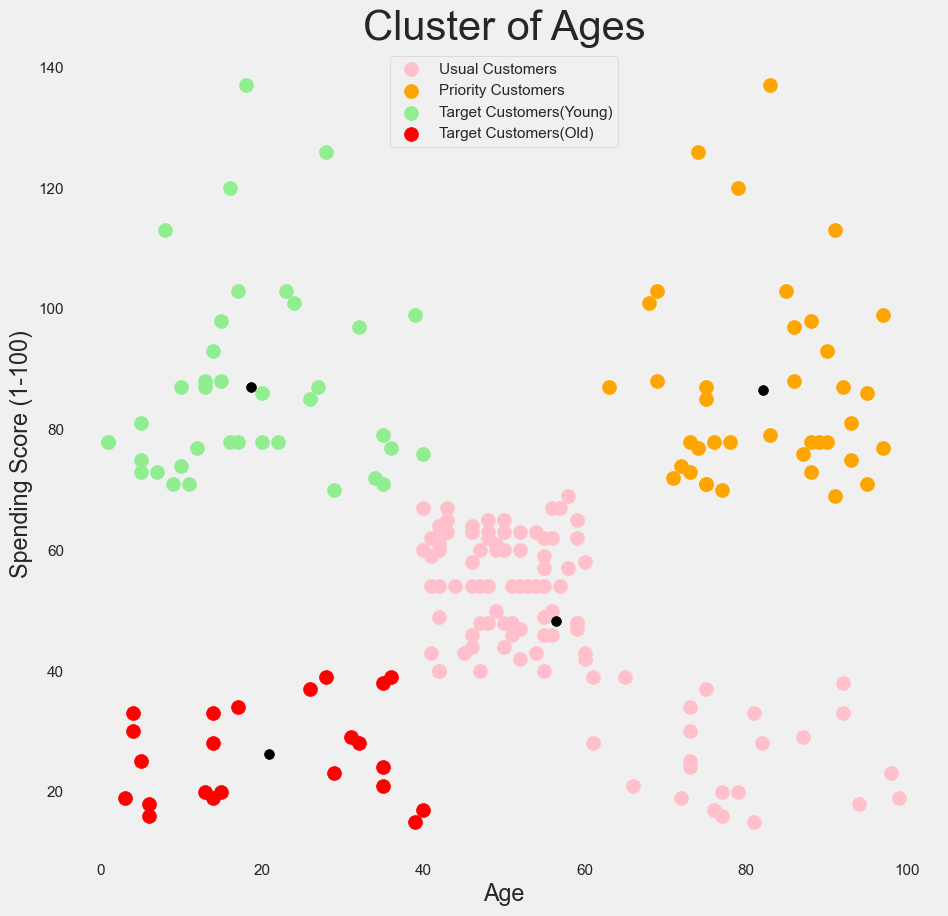

In [77]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
ymeans = kmeans.fit_predict(x)

print(f'Cluster Assignment :\n{y_means}\n\n')

print(f'Centroid for Each Cluster :\n{km.cluster_centers_}\n\n')

plt.rcParams['figure.figsize'] = (10, 10)
plt.title('Cluster of Ages', fontsize = 30)

plt.scatter(x[ymeans == 0, 0], x[ymeans == 0, 1], s = 100, c = 'pink', label = 'Usual Customers' )
plt.scatter(x[ymeans == 1, 0], x[ymeans == 1, 1], s = 100, c = 'blue', label = 'Priority Customers')
plt.scatter(x[ymeans == 2, 0], x[ymeans == 2, 1], s = 100, c = 'green', label = 'Target Customers(Young)')
plt.scatter(x[ymeans == 3, 0], x[ymeans == 3, 1], s = 100, c = 'red', label = 'Target Customers(Old)')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 50, c = 'black')

plt.style.use('fivethirtyeight')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid()
plt.show()

> According to my own intuition by looking at the above clustering plot between the age of the customers and their corresponding spending scores, I have aggregated them into 4 different categories namely Usual Customers, Priority Customers, Senior Citizen Target Customers and Youth Target Customers. 
Then after getting the results we can accordingly make different marketing strategies and policies to  optimize the spending scores of the customer in the Mall.